In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [57]:


orig = pd.read_csv('test_data.csv')
mode = pd.read_csv('Corr_Mode.csv')
median = pd.read_csv('Corr_Median.csv')
k2 = pd.read_csv('Corr_K2.csv')
k4 = pd.read_csv('Corr_K4.csv')
bridge = pd.read_csv('Corr_BRidge.csv')


In [58]:
import matplotlib.pyplot as plt

orig_corr = orig.corr()['Diabetes_binary'][1:]
mode_corr = mode.corr()['Diabetes_binary'][1:]
median_corr = median.corr()['Diabetes_binary'][1:]
k2_corr = k2.corr()['Diabetes_binary'][1:]
k4_corr = k4.corr()['Diabetes_binary'][1:]
bridge_corr = bridge.corr()['Diabetes_binary'][1:]

columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
           'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
corr_lis = [orig_corr, mode_corr,  k2_corr, k4_corr, median_corr, bridge_corr]
stringss = ["Original", "Mode", "K2", "K4", "Median", "BRidge"]

high = []
for i in corr_lis:
    high.append(i['CholCheck'])
print(high)
# print(corr_lis)

[-0.0035712951709481297, -0.0035390463829983857, -0.0036032632091328705, -0.0035390463829983857, -0.0035390463829983857, -0.0035390463829983857]


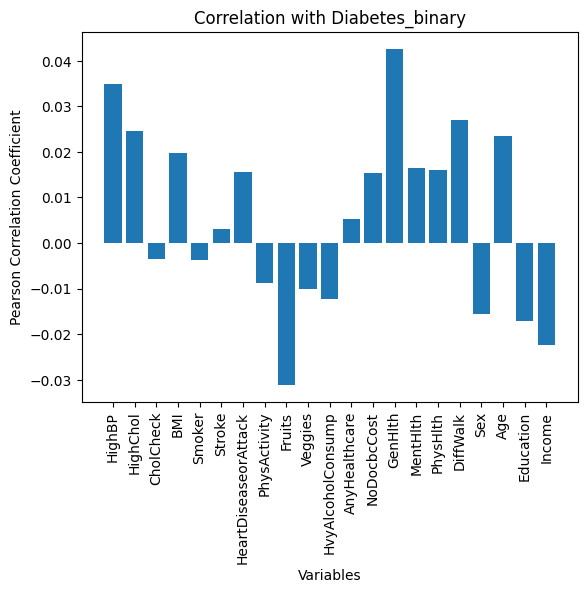

In [59]:

plt.bar(median_corr.index, median_corr.values)
plt.title("Correlation with Diabetes_binary")
plt.xlabel("Variables")
plt.ylabel("Pearson Correlation Coefficient")
plt.xticks(rotation=90)
plt.show()


In [108]:
dependency_error = [0,0,0,0,0]
for i in columns[1:]:
    high = []
    for j in corr_lis:
        high.append(j[i])
    # plt.bar(stringss, high)
    # plt.xlabel("Diabetes Dependency on " + i)
    # plt.ylabel("Pearson Correlation Coefficient")
    # plt.title("Model used")
    # plt.ylim([min(high)-00.0001, max(high)+0.0001])
    # plt.show()

    # print(high)
    # print(len(high))
    for i in range(1, 6):
        x = high[i]
        val = abs(x-high[0])
        val = val / (abs(x+high[0]))
        val = val*2
        dependency_error[i-1] = dependency_error[i-1] + val
        # print(dependency_error)


In [109]:
print(len(columns))
for i in range(0, len(dependency_error)):
    dependency_error[i] = dependency_error[i]/21
    dependency_error[i] = 1-dependency_error[i]
    dependency_error[i] = dependency_error[i]*100
print(dependency_error)

22
[98.62003871846167, 98.07885480672101, 98.72056300722387, 98.0586012551628, 99.23507910272617]
